In [1]:
#data analysis
import pandas as pd
import numpy as np
#data visualization
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)
matches = pd.read_csv("D:\R PROGRAMMIMGS\matches.csv")
deliveries = pd.read_csv("D:\R PROGRAMMIMGS\deliveries.csv")

In [3]:
print(matches.shape, deliveries.shape)

(636, 18) (150460, 21)


In [64]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,Indore,08/04/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0


In [65]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
631,632,2016,Raipur,22/05/2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,0
632,633,2016,Bangalore,24/05/2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,0
633,634,2016,Delhi,25/05/2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,0
634,635,2016,Delhi,27/05/2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,0
635,636,2016,Bangalore,29/05/2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,0


In [66]:
matches.shape

(636, 18)

In [67]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [68]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             636 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   result           636 non-null    object
 9   dl_applied       636 non-null    int64 
 10  winner           636 non-null    object
 11  win_by_runs      636 non-null    int64 
 12  win_by_wickets   636 non-null    int64 
 13  player_of_match  636 non-null    object
 14  venue            636 non-null    object
 15  umpire1          636 non-null    object
 16  umpire2          636 non-null    object
 17  umpire3          636 non-null    ob

In [69]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


In [70]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [71]:
matches.replace(np.nan, "0", inplace = True)

In [72]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [73]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,boundaries
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0,0,0,0


In [74]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,boundaries
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,0,0,0,0
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha,0
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,0,0,0,0
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,0,0,0,0
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,0,0,0,4,0,4,0,0,0,4


In [75]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'boundaries'],
      dtype='object')

In [76]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [77]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,boundaries
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466,0.714143
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240,1.693173
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000,6.000000


In [78]:
deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
boundaries          0
dtype: int64

In [79]:
deliveries.replace(np.nan, "0", inplace = True)

In [80]:
deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
boundaries          0
dtype: int64

In [81]:
#for finding the frequency of a categorical column we use value_counts() method

In [82]:
matches['player_of_match'].value_counts()[0:5]

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
Name: player_of_match, dtype: int64

In [83]:
#to get the values of frequency of the categorical column 

In [84]:
list(matches['player_of_match'].value_counts().keys())

['CH Gayle',
 'YK Pathan',
 'AB de Villiers',
 'DA Warner',
 'SK Raina',
 'RG Sharma',
 'MS Dhoni',
 'G Gambhir',
 'AM Rahane',
 'MEK Hussey',
 'V Sehwag',
 'V Kohli',
 'DR Smith',
 'SR Watson',
 'JH Kallis',
 'KA Pollard',
 'A Mishra',
 'SE Marsh',
 'SR Tendulkar',
 'RV Uthappa',
 'RA Jadeja',
 'AT Rayudu',
 'AC Gilchrist',
 'BJ Hodge',
 'Harbhajan Singh',
 'M Vijay',
 'A Nehra',
 'SP Narine',
 'AD Russell',
 'UT Yadav',
 'Yuvraj Singh',
 'BB McCullum',
 'AJ Finch',
 'B Kumar',
 'JP Faulkner',
 'KC Sangakkara',
 'DPMD Jayawardene',
 'SL Malinga',
 'GJ Maxwell',
 'SC Ganguly',
 'DW Steyn',
 'Sandeep Sharma',
 'ML Hayden',
 'PA Patel',
 'AR Patel',
 'KD Karthik',
 'KH Pandya',
 'JP Duminy',
 'JD Unadkat',
 'SPD Smith',
 'NM Coulter-Nile',
 'SK Warne',
 'MK Pandey',
 'PP Chawla',
 'KP Pietersen',
 'L Balaji',
 'R Vinay Kumar',
 'Mandeep Singh',
 'A Symonds',
 '0',
 'M Vohra',
 'MK Tiwary',
 'A Kumble',
 'DA Miller',
 'LRPL Taylor',
 'WP Saha',
 'CJ Anderson',
 'KK Nair',
 'BA Stokes',
 '

In [85]:
#to get values of frequency of the categorical column of first 05 data

In [86]:
list(matches['player_of_match'].value_counts()[0:5].keys())

['CH Gayle', 'YK Pathan', 'AB de Villiers', 'DA Warner', 'SK Raina']

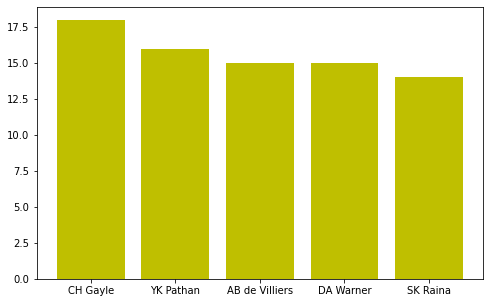

In [87]:
# making a bar-plot for the top 5 players with most man of the match awards
plt.figure(figsize=(8,5))
plt.bar(list(matches['player_of_match'].value_counts()[0:5].keys()),list(matches['player_of_match'].value_counts()[0:5]),color="y")
plt.show()

In [88]:
#getting the frequency of the result column
matches['result'].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [89]:
#finding out the number of toss wins with respect to each teams
matches['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [90]:
#percentage distribution of the team batting first and winning the match
batting_first=matches[matches['win_by_runs']!=0]

In [91]:
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
4,5,2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0
8,9,2017,Pune,11/04/2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,0
13,14,2017,Kolkata,15/04/2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,0
14,15,2017,Delhi,15/04/2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,0


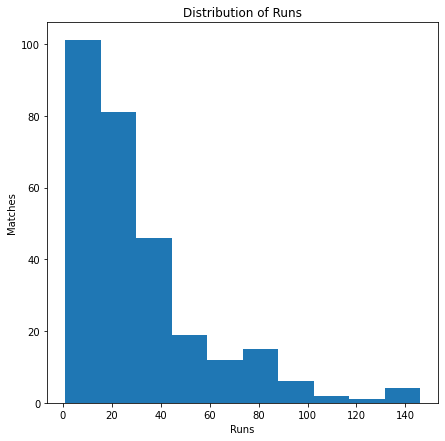

In [92]:
#making a histogram
plt.figure(figsize=(7,7))
plt.hist(batting_first['win_by_runs'])
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.ylabel("Matches")
plt.show()

In [93]:
#finding out the number of wins with respect to each teams after batting first
batting_first['winner'].value_counts()

Mumbai Indians                 47
Chennai Super Kings            46
Kings XI Punjab                32
Kolkata Knight Riders          31
Royal Challengers Bangalore    30
Sunrisers Hyderabad            23
Rajasthan Royals               23
Delhi Daredevils               21
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

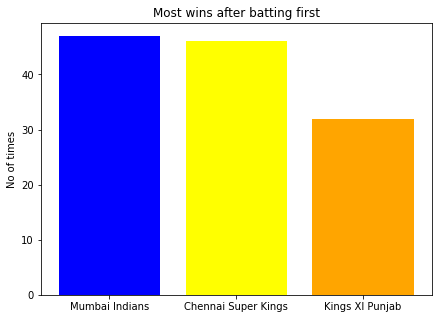

In [94]:
# Making a barplot for the top 3 teams with most wins after batting first
plt.figure(figsize=(7,5))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=["blue","yellow","orange"])
plt.title("Most wins after batting first")
plt.ylabel("No of times")
plt.show()

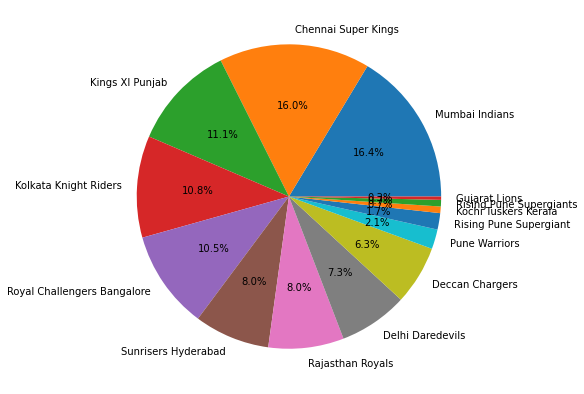

In [95]:
#Making a pie chart for the distribution of wins
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [96]:
#Extracting those records where the team has won the match after batting second
batting_second=matches[matches['win_by_wickets']!=0]

In [97]:
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,Indore,08/04/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
5,6,2017,Hyderabad,09/04/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,0
6,7,2017,Mumbai,09/04/2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,0


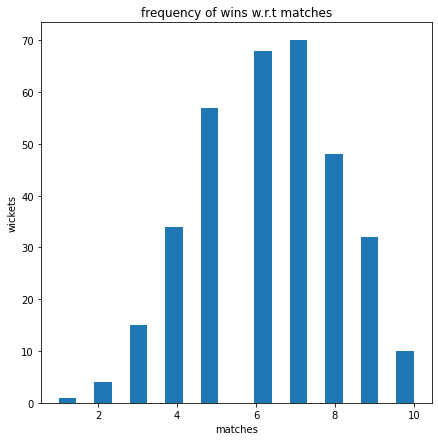

In [98]:
#Making a histogram for frequency of wins w.r.t number of wickets
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'],bins=20)
plt.xlabel("matches")
plt.ylabel("wickets")
plt.title("frequency of wins w.r.t matches")
plt.show()

In [99]:
# Finding out the frequency of number of wins w.r.t each time after batting second
batting_second['winner'].value_counts()

Kolkata Knight Riders          46
Mumbai Indians                 44
Royal Challengers Bangalore    42
Delhi Daredevils               41
Rajasthan Royals               38
Kings XI Punjab                36
Chennai Super Kings            33
Sunrisers Hyderabad            18
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

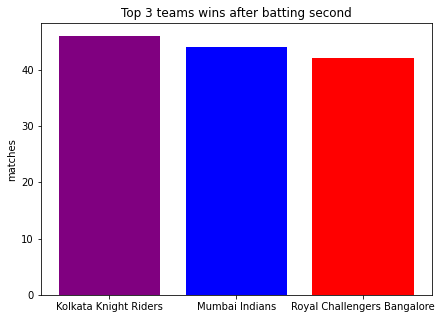

In [100]:
# Making bar plots for the top 3 teams with most wins after batting second
plt.figure(figsize=(7,5))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=["purple","blue","red"])
plt.ylabel("matches")
plt.title("Top 3 teams wins after batting second")
plt.show()

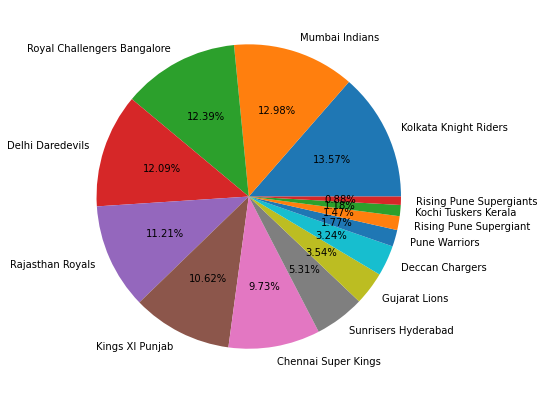

In [101]:
# Making a pie chart for the distribution of most wins after batting second
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.2f%%')
plt.show()

In [102]:
# Number of matches played in each seasons
matches['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [103]:
matches['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
0                  7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

In [104]:
#Finding how many time a team has won the match after winning the toss
import numpy as np
np.sum(matches['toss_winner']==matches['winner'])

325

In [105]:
325/636

0.5110062893081762

In [106]:
matches[matches["umpire1"].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [107]:
#EDA Exploratory data analysis

In [108]:
#Total number of matches in every season

In [109]:
matches["season"].value_counts().reset_index()

,index,season
0,2013,76
1,2012,74
2,2011,73
3,2010,60
4,2014,60
5,2016,60
6,2017,59
7,2015,59
8,2008,58
9,2009,57


[Text(0.5, 1.0, 'Total number of matches in each season')]

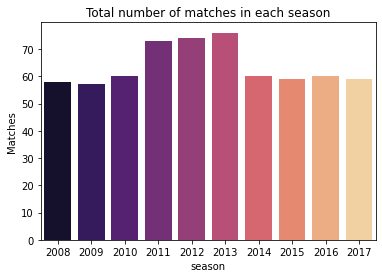

In [110]:
total_matches_season = matches["season"].value_counts().reset_index()
total_matches_season.columns = ["season","Matches"]
sns.barplot(x='season',y="Matches", data=total_matches_season,palette='magma').set(title="Total number of matches in each season")

In [111]:
#matches played vs win by each team

In [112]:
matches_played = pd.concat([matches["team1"],matches["team2"]], axis=0)
matches_played = matches_played.value_counts().reset_index()
matches_played.columns = ["Team","Total Matches Played"]
matches_played["winner"] = matches["winner"].value_counts().reset_index()["winner"]
matches_played["winner_percentage"] = matches_played["winner"]/matches_played["Total Matches Played"]
matches_played


,Team,Total Matches Played,winner,winner_percentage
0,Mumbai Indians,157,92,0.585987
1,Royal Challengers Bangalore,152,79,0.519737
2,Kolkata Knight Riders,148,77,0.520270
3,Kings XI Punjab,148,73,0.493243
4,Delhi Daredevils,147,70,0.476190
5,Chennai Super Kings,131,63,0.480916
6,Rajasthan Royals,118,62,0.525424
7,Sunrisers Hyderabad,76,42,0.552632
8,Deccan Chargers,75,29,0.386667
9,Pune Warriors,46,13,0.282609


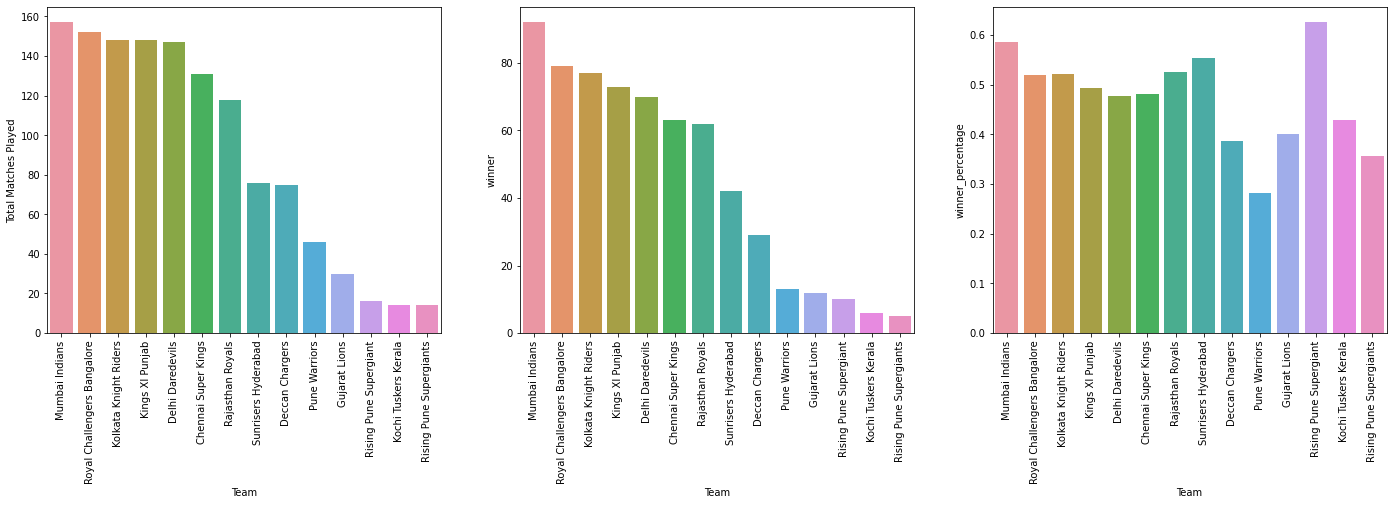

In [113]:
ig,axes = plt.subplots(nrows=1,ncols=3,figsize=(24,6))
sns.barplot(x='Team',y='Total Matches Played',data=matches_played, ax=axes[0]).set_xticklabels(matches_played["Team"],rotation=90)
sns.barplot(x='Team',y='winner',data=matches_played, ax=axes[1]).set_xticklabels(matches_played["Team"],rotation=90)
sns.barplot(x='Team',y='winner_percentage',data=matches_played, ax=axes[2]).set_xticklabels(matches_played["Team"],rotation=90); 


In [114]:
# Which city has hosted the maximum number of matches?

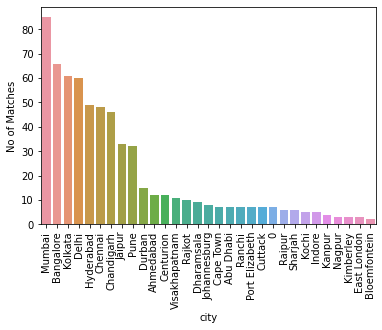

In [115]:
matches_city = matches['city'].value_counts().reset_index().sort_values(by='city',ascending=False)
matches_city.columns = ['city','No of Matches']
sns.barplot(x='city',y='No of Matches',data=matches_city).set_xticklabels(matches_city["city"],rotation=90);

In [116]:
#Number of matches hosted in each stadium

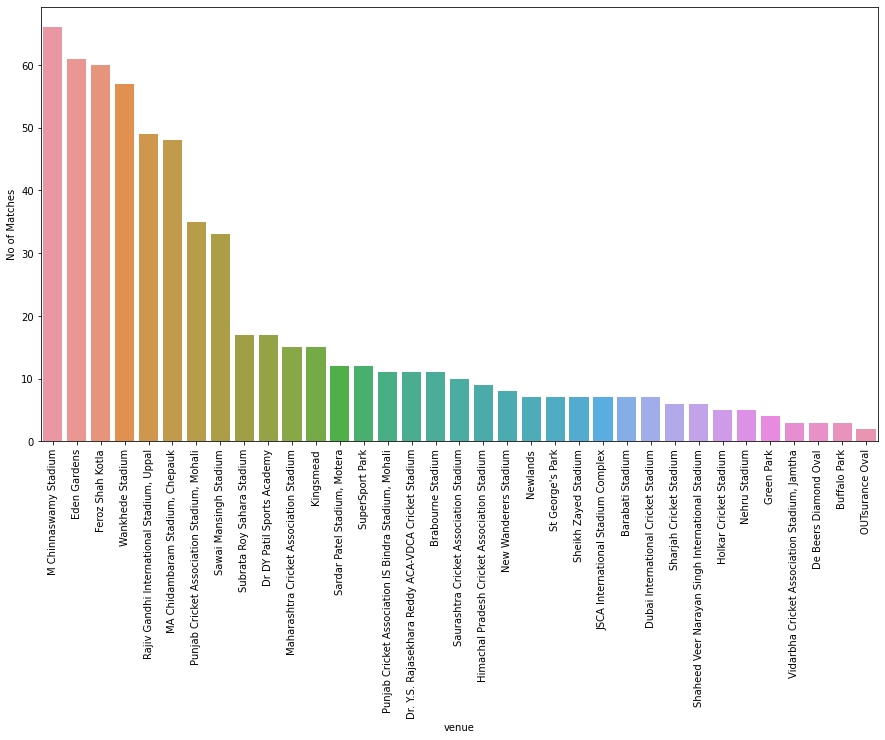

In [117]:
fig, axex = plt.subplots(figsize=(15,8))
matches_venue = matches["venue"].value_counts().reset_index().sort_values(by='venue',ascending=False)
matches_venue.columns = ["venue",'No of Matches']
sns.barplot(x='venue',y='No of Matches',data=matches_venue).set_xticklabels(matches_venue["venue"],rotation=90);

In [118]:
#total and average runs per season

In [119]:
runs = matches.merge(deliveries,left_on = 'id', right_on = 'match_id', how='left').drop('id',axis=1)

total_runs_season = runs.groupby(['season'])['total_runs'].sum().reset_index()
matches_season = matches.groupby(['season']).count()["id"].reset_index()
matches_season.rename(columns={'id' : 'matches'},inplace=True)
matches_season["total_runs"] = total_runs_season["total_runs"]
matches_season["average_runs_per_match"] = matches_season["total_runs"]/ matches_season['matches']
matches_season

,season,matches,total_runs,average_runs_per_match
0,2008,58,17937,309.258621
1,2009,57,16353,286.894737
2,2010,60,18883,314.716667
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,60,18931,315.516667
7,2015,59,18353,311.067797
8,2016,60,18862,314.366667
9,2017,59,18786,318.406780


In [120]:
# Number of runs scored as percentage of Boundaries
# To predict the best batsman overall the season

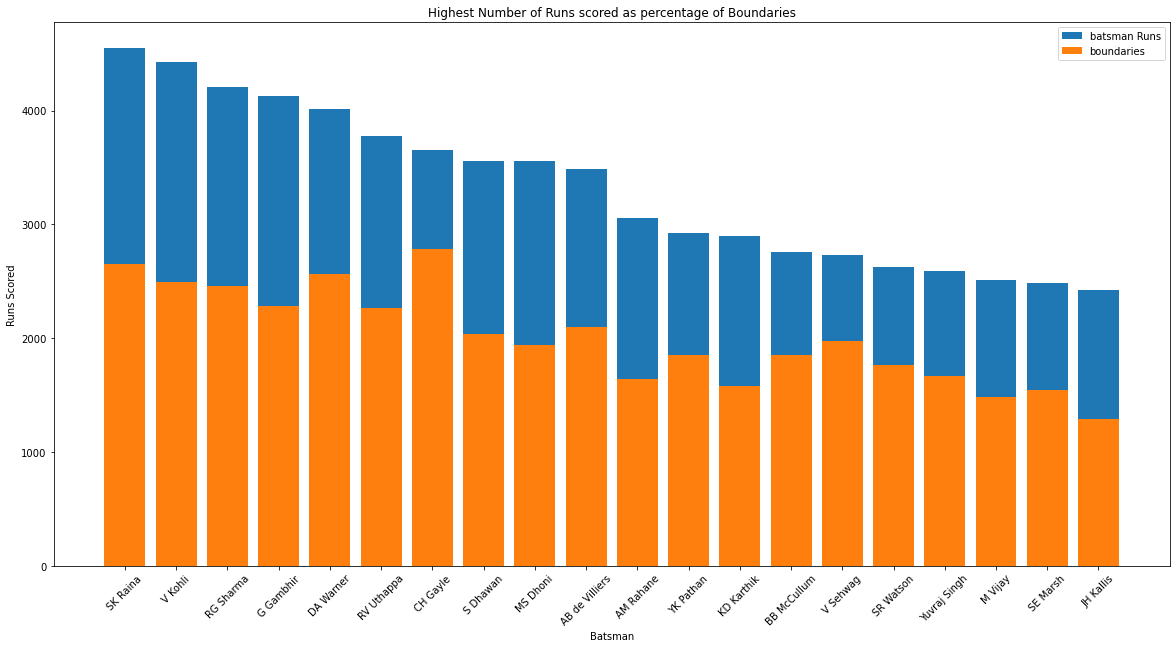

In [121]:
deliveries['boundaries'] = 0

deliveries.loc[(deliveries['batsman_runs']>=4) & (deliveries['batsman_runs']!=6),'boundaries'] = 4
deliveries.loc[(deliveries['batsman_runs']>=6),'boundaries'] = 6

percentage_runs_boundaries = pd.merge(
      deliveries[['batsman','batsman_runs']].groupby(by='batsman').sum().reset_index(),
      deliveries[['batsman','boundaries']].groupby(by='batsman').sum().reset_index(),
    how='outer')

percentage_runs_boundaries['run%'] = np.round(percentage_runs_boundaries['boundaries']*100/percentage_runs_boundaries['batsman_runs'],2)
percentage_runs_boundaries = percentage_runs_boundaries.sort_values(by='run%',ascending=False)

percentage_runs_boundaries.dropna(inplace=True)
percentage_runs_boundaries = percentage_runs_boundaries.sort_values(by="batsman_runs",ascending=False).head(20)
plt.figure(figsize=[20,10])
plt.bar(percentage_runs_boundaries['batsman'],percentage_runs_boundaries['batsman_runs'], label='batsman Runs', bottom=0)
plt.bar(percentage_runs_boundaries['batsman'],percentage_runs_boundaries['boundaries'], label='boundaries',bottom=0)
plt.title('Highest Number of Runs scored as percentage of Boundaries')
plt.xlabel('Batsman')
plt.ylabel('Runs Scored')
plt.legend()
plt.xticks(rotation=45)
plt.show()